In [ ]:
!pip install face_recognition
import face_recognition
from PIL import Image, ImageDraw
from IPython.display import display
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

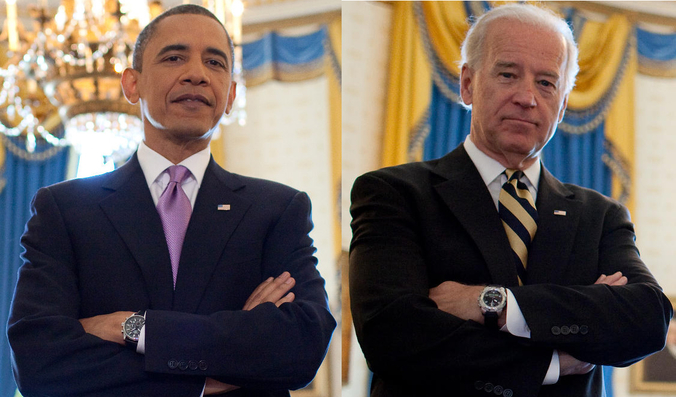

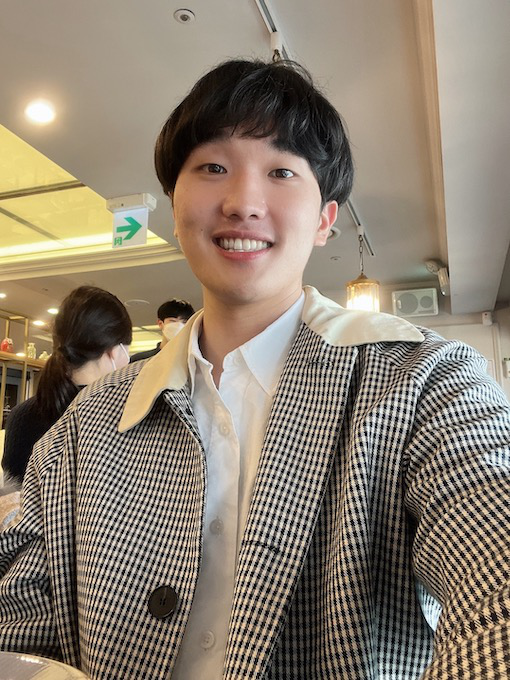

In [84]:
from PIL import Image, ImageDraw
from IPython.display import display
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
presidents_img = Image.open('two_people.jpg')
my_img = Image.open('me.jpeg')
display(presidents_img)
display(my_img)

In [85]:
# 사진을 픽셀 행렬 데이터로 변환해준다.
obama_image = face_recognition.load_image_file("obama.jpg")
# 각 픽셀데이터로부터 128차원을 가진 데이터로 인코딩 해준다.
# 얼굴에 있는 각 사람들에 대한 인코딩 값이고, 끝에 [0]을 해줘야 에러가 안난다.
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# 바이든 이미지 처리
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# 내 이미지 처리
me_image = face_recognition.load_image_file('me.jpeg')
me_face_encoding = face_recognition.face_encodings(me_image)[0]

# 인식한 인코딩들을 리스트로 담아준다.
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding,
    me_face_encoding
]

# 인식한 인코딩들을 뭐라고 인식할지 이름을 써준다.
known_face_names = [
    "Barack Obama",
    "Joe Biden",
    'Sihyun An'
]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 3 images.


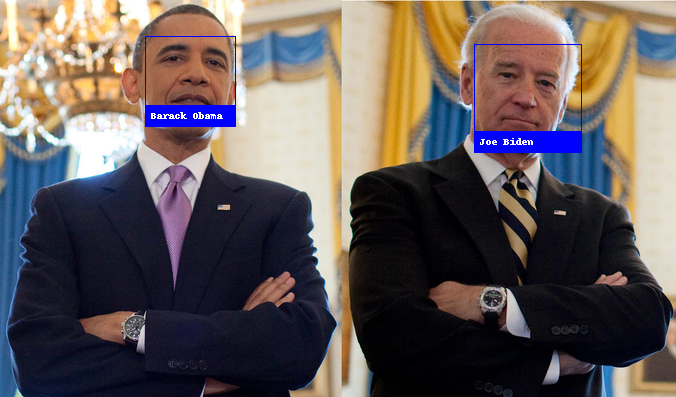

In [86]:
# 테스트 해볼 이미지 로드
unknown_image = face_recognition.load_image_file("two_people.jpg")

# 이 사진에서 얼굴들의 위치가 어디있는지 인식한 후, 위치 좌표를 반환해준다.
face_locations = face_recognition.face_locations(unknown_image)
# 위와 마찬가지로 사진속 인물들에 대한 인코딩 값을 추출해 준다.
# 사진속 인물들이 2명임을 인식하여, 반환값도 두 개의 배열값이 나온다.
# face_locations는 안해도 결과가 똑같다. 근데 에러가 어떻게 날지 혹시 모르니까 그냥 해주자.
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# 얼굴들에 대한 위치를 그리기 위한 변환작업
pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

# 사진속 각 인물들에 대해서 루프를 돈다.
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # 미리 학습된 사진과 일치한다면, True, 그렇지 않은 인물들에 대해서는 False를 출력해준다.
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    # 모르는 사람들에 대해서는 Unknown을 반환해준다.
    name = "Unknown"

    # 아니면 거리를 기준으로 알려진 인물과 가장 가까운 인물을 매칭해줄 수도 있다.
    # 이게 정확도가 더 높긴하다
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Pillow를 이용해서 얼굴 주변에 박스를 그리고 이름을 표시해 준다.
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


del draw

display(pil_image)

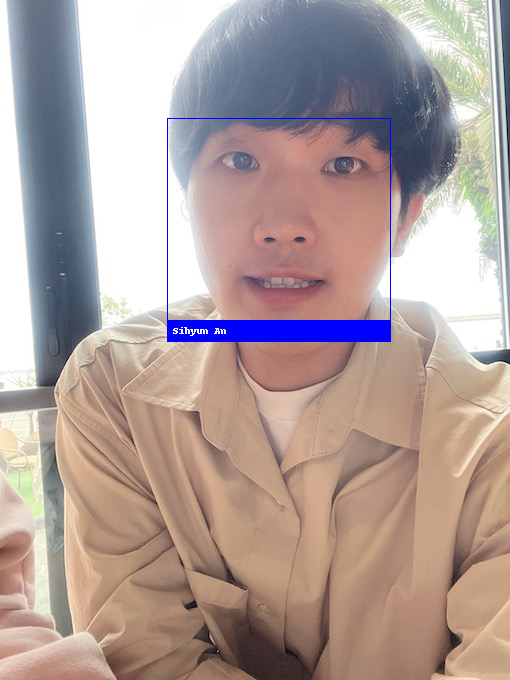

In [87]:
display(my_image)